# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\Sam\Desktop\CF\Project 4 Instacart Basket\Instacart Basket Analysis\02 Data\Prepared Data"
df=pd.read_pickle(os.path.join(path,"customer_instacart_merged.pkl"))

In [3]:
# checking for execution
df.shape

(32404859, 34)

In [4]:
df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_between_orders,order_frequency,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular Busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular Busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular Busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular Busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regular Busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
df["_merge"].value_counts()

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [6]:
#dropping _merge coulmn
dff=df.drop(columns=["_merge"])

In [7]:
#checking for execution
dff.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_between_orders,order_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range,Regular Busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range,Regular Busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range,Regular Busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range,Regular Busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range,Regular Busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [8]:
dff.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency'],
      dtype='object')

In [9]:
#dropping eval_set,aisle_id coulmns
dffd=dff.drop(columns=["eval_set","aisle_id"])

In [10]:
#checking for execution
dffd.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency'],
      dtype='object')

In [11]:
# creating a crosstab
crosstab = pd.crosstab(dffd["days_since_prior_order"], dffd["order_number"], dropna = False)

In [12]:
# copying crosstab to clipboard
crosstab.to_clipboard()

## 2. Security implications that might exist for the new data will include columns containing personal information: first_name,last_name,income,matiral_status

## 3. Create a regional segmentation of the data

In [13]:
# creating a region column
dffd["region"]="South"
dffd.loc[dffd["state"].isin(["Maine","New Hampshire","Vermont","Massachusetts","Rhode Island","Connecticut","New York","Pennsylvania","New Jersey"]),"region"]="Northeast"
dffd.loc[dffd["state"].isin(["Wisconsin","Michigan","Illinois","Indiana","Ohio","North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Iowa","Missouri"]),"region"]="Midwest"
dffd.loc[dffd["state"].isin(["Idaho","Montana","Wyoming","Nevada","Utah","Colorado","Arizona","New Mexico","Alaska","Washington","Oregon","California","Hawaii"]),"region"]="West"

In [14]:
# checking for execution
dffd["region"].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
# checking accuracy
dffd[["state","region"]].head(3)

,state,region
0,Missouri,Midwest
1,Missouri,Midwest
2,Missouri,Midwest


In [16]:
dffd[["state","region"]].tail(3)

,state,region
32404856,New York,Northeast
32404857,New York,Northeast
32404858,New York,Northeast


### Determining spending habits in different regions

In [17]:
cross=pd.crosstab(dffd["spending_flag"],dffd["region"],dropna=False)

In [18]:
cross

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,29265,18642,40579,31242
Low spender,7568060,5704094,10751306,8261671


In [19]:
# exporting cross
cross.to_clipboard()

## 4. Customers who don’t generate much revenue

In [20]:
#creating an exclusion flag
dffd["exclusion_flag"]=dffd["max_order"]<5

In [21]:
#checking execution
dffd["exclusion_flag"].value_counts()

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [22]:
# data of customers not generating revenue
no_revenue_customers=dffd[dffd["exclusion_flag"]]

In [23]:
#checking for execution
no_revenue_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440295 entries, 729 to 32404858
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   user_id                     1440295 non-null  int64  
 1   first_name                  1440295 non-null  object 
 2   last_name                   1440295 non-null  object 
 3   gender                      1440295 non-null  object 
 4   state                       1440295 non-null  object 
 5   age                         1440295 non-null  int64  
 6   date_joined                 1440295 non-null  object 
 7   number_of_dependants        1440295 non-null  int64  
 8   marital_status              1440295 non-null  object 
 9   income                      1440295 non-null  int64  
 10  product_id                  1440295 non-null  int64  
 11  product_name                1440295 non-null  object 
 12  department_id               1440295 non-null  int64  
 13 

In [24]:
#exporting the lsit
no_revenue_customers.to_pickle(os.path.join(path,"no_revenue_customers.pkl"))

In [25]:
#creating a frame without no revenue generating customers
df_final=dffd[~dffd["exclusion_flag"]]

In [26]:
#checking for execution
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404817
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     int64  
 1   first_name                  object 
 2   last_name                   object 
 3   gender                      object 
 4   state                       object 
 5   age                         int64  
 6   date_joined                 object 
 7   number_of_dependants        int64  
 8   marital_status              object 
 9   income                      int64  
 10  product_id                  int64  
 11  product_name                object 
 12  department_id               int64  
 13  prices                      float64
 14  order_id                    int64  
 15  order_number                int64  
 16  order_dow                   int64  
 17  order_hour_of_day           int64  
 18  days_since_prior_order      float64
 19  add_to_cart_order       

In [27]:
#exporting the frame without customers generating no revenue
df_final.to_pickle(os.path.join(path,"final_dataframe"))

## 5. Customer profiling. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [28]:
# checking spending flag value count
df_final["spending_flag"].value_counts()

spending_flag
Low spender     30867121
High spender       97443
Name: count, dtype: int64

In [29]:
# checking income value count
df_final["income"].value_counts()

income
72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
91717        5
158963       5
59941        5
44942        5
147660       2
Name: count, Length: 96069, dtype: int64

In [30]:
# creating income groups
income_group=[]
for x in df_final["income"]:
    if x<30000:
        income_group.append("low income")
    elif x>=30000 and x<100000:
        income_group.append("medium income")
    else:
        income_group.append("high income")

In [31]:
# checking for execution
income_group

['high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'high income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium income',
 'medium i

In [32]:
df_final["income_group"]=income_group

C:\Users\Sam\AppData\Local\Temp\ipykernel_3112\1199764753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["income_group"]=income_group


In [33]:
#checking for execution
df_final.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency',
       'region', 'exclusion_flag', 'income_group'],
      dtype='object')

In [34]:
#getting value count for income_group
df_final["income_group"].value_counts()

income_group
medium income    16563292
high income      14207402
low income         193870
Name: count, dtype: int64

Text(0.5, 0, 'Income Group')

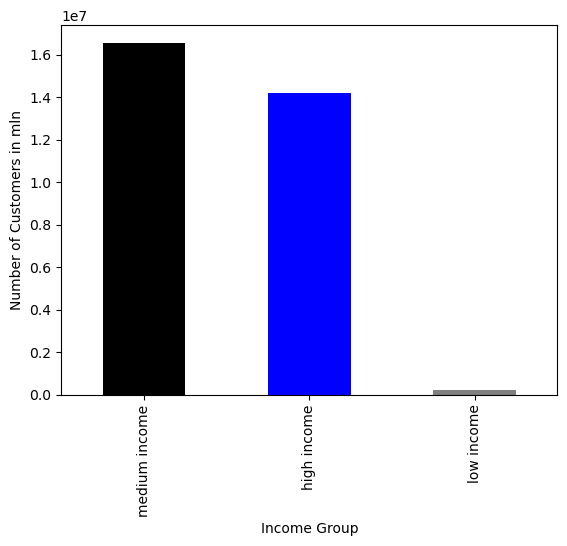

In [35]:
# creating a pie chart for income_group
bar=df_final["income_group"].value_counts().plot.bar(color=["Black","Blue","Grey"])
plt.ylabel("Number of Customers in mln")
plt.xlabel("Income Group")

In [36]:
# exporting chart
path1=r"C:\Users\Sam\Desktop\CF\Project 4 Instacart Basket\Instacart Basket Analysis\04 Analysis"
bar.figure.savefig(os.path.join(path1,"visualizations","Income_group_bar.png"))

In [37]:
#creating age groups
age_groups=[]
for x in df_final["age"]:
    if x<20:
        age_groups.append("Young")
    elif x>=20 and x<65:
        age_groups.append("Working-age adult")
    else:
        age_groups.append("Elderly")
df_final["age_group"]=age_groups

C:\Users\Sam\AppData\Local\Temp\ipykernel_3112\1941542954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["age_group"]=age_groups


In [38]:
#checking for execution
df_final["age_group"].value_counts()

age_group
Working-age adult    21794486
Elderly               8195544
Young                  974534
Name: count, dtype: int64

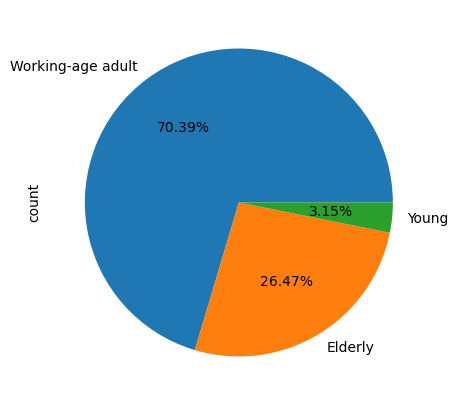

In [39]:
#creating a pie chart for the age group
age_pie=df_final["age_group"].value_counts().plot(kind="pie",figsize=(5, 5),autopct='%.2f%%')

In [40]:
# exporting the pie chart
age_pie.figure.savefig(os.path.join(path1,"visualizations","age_groups_pie_chart"))

#### Creating a dependent flag

In [41]:
#grouping by user id
df_final["dependent"]=df_final.groupby(["user_id"])["number_of_dependants"]

ValueError: Length of values (162631) does not match length of index (30964564)

In [42]:
# transforming with mean 
df_final["dependent"]=df_final.groupby(["user_id"])["number_of_dependants"].transform("mean")

C:\Users\Sam\AppData\Local\Temp\ipykernel_3112\2327523071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["dependent"]=df_final.groupby(["user_id"])["number_of_dependants"].transform("mean")


In [43]:
#checking for execution
df_final["dependent"].value_counts()

dependent
3.0    7772516
0.0    7739681
2.0    7733261
1.0    7719106
Name: count, dtype: int64

In [44]:
#creating the flag using loc
df_final.loc[df_final["dependent"]>0,"dependent_flag"]="with dependents"
df_final.loc[df_final["dependent"]<=0,"dependent_flag"]="without dependents"

C:\Users\Sam\AppData\Local\Temp\ipykernel_3112\411862005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[df_final["dependent"]>0,"dependent_flag"]="with dependents"


In [45]:
#checking for execution
df_final["dependent_flag"].value_counts()

dependent_flag
with dependents       23224883
without dependents     7739681
Name: count, dtype: int64

#### Creating customer profile

In [46]:
# customer profile based on age, income, w or wo dependents
df_final["customer_profile"]=df_final["marital_status"]+" "+df_final["age_group"]+" "+df_final["income_group"]+" "+df_final["dependent_flag"]

C:\Users\Sam\AppData\Local\Temp\ipykernel_3112\3865594901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["customer_profile"]=df_final["marital_status"]+" "+df_final["age_group"]+" "+df_final["income_group"]+" "+df_final["dependent_flag"]


In [47]:
#checking for execution
df_final["customer_profile"]

0           married Working-age adult high income with dep...
1           married Working-age adult high income with dep...
2           married Working-age adult high income with dep...
3           married Working-age adult high income with dep...
4           married Working-age adult high income with dep...
                                  ...                        
32404813        married Elderly medium income with dependents
32404814        married Elderly medium income with dependents
32404815        married Elderly medium income with dependents
32404816        married Elderly medium income with dependents
32404817        married Elderly medium income with dependents
Name: customer_profile, Length: 30964564, dtype: object

In [48]:
#checking value count
df_final["customer_profile"].value_counts()

customer_profile
married Working-age adult medium income with dependents                             9186328
married Working-age adult high income with dependents                               6269195
married Elderly high income with dependents                                         4321703
single Working-age adult medium income without dependents                           3109977
married Elderly medium income with dependents                                       1844534
single Working-age adult high income without dependents                             1713447
divorced/widowed Elderly high income without dependents                             1420060
living with parents and siblings Young medium income with dependents                 717221
living with parents and siblings Working-age adult medium income with dependents     696406
divorced/widowed Elderly medium income without dependents                            600950
divorced/widowed Working-age adult high income without dependen

#### Grouping customer profile with money spent on the platform

In [49]:
df_final.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency',
       'region', 'exclusion_flag', 'income_group', 'age_group', 'dependent',
       'dependent_flag', 'customer_profile'],
      dtype='object')

In [50]:
# grouping profiles with prices
profile_revenue_generated=df_final.groupby("customer_profile")["prices"].sum()

In [51]:
#checking for execution
profile_revenue_generated

customer_profile
divorced/widowed Elderly high income without dependents                             11291900.1
divorced/widowed Elderly low income without dependents                                  5945.4
divorced/widowed Elderly medium income without dependents                            4474672.3
divorced/widowed Working-age adult high income without dependents                    3385124.9
divorced/widowed Working-age adult low income without dependents                        9257.8
divorced/widowed Working-age adult medium income without dependents                  1465463.0
living with parents and siblings Working-age adult high income with dependents        198109.6
living with parents and siblings Working-age adult low income with dependents          67227.6
living with parents and siblings Working-age adult medium income with dependents     5423011.3
living with parents and siblings Young high income with dependents                    177799.6
living with parents and siblings 

In [52]:
# organizing in ascending order
profile_revenue_generated_sort=profile_revenue_generated.sort_values()

In [53]:
#checking for execution
profile_revenue_generated_sort

customer_profile
divorced/widowed Elderly low income without dependents                                  5945.4
divorced/widowed Working-age adult low income without dependents                        9257.8
single Young low income without dependents                                             22476.5
married Elderly low income with dependents                                             49068.9
living with parents and siblings Young low income with dependents                      62888.0
living with parents and siblings Working-age adult low income with dependents          67227.6
single Young high income without dependents                                            76030.0
living with parents and siblings Young high income with dependents                    177799.6
living with parents and siblings Working-age adult high income with dependents        198109.6
single Working-age adult low income without dependents                                301218.8
married Working-age adult low inc

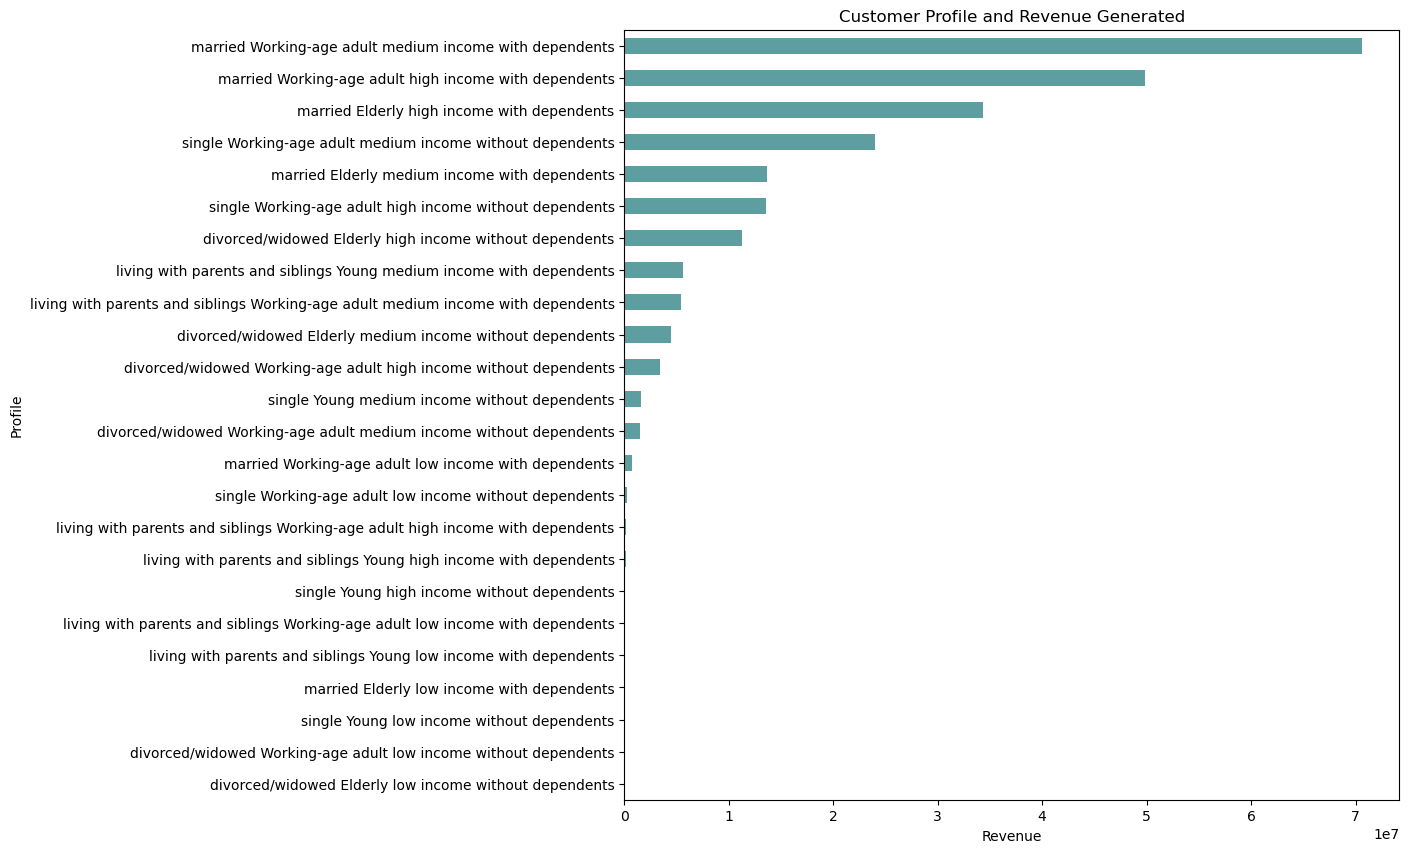

In [54]:
#creating a bar chart to viualize findings
bar_profile_revenue = profile_revenue_generated_sort.plot.barh(title="Customer Profile and Revenue Generated",xlabel="Revenue",ylabel="Profile",color=["cadetblue"])
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [55]:
# exporting the chart
bar_profile_revenue.figure.savefig(os.path.join(path1,"visualizations","profiles_revenue_generated.png"))

#### Grouping by profile and department sales

In [56]:
# finding department info in df_final
df_final.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency',
       'region', 'exclusion_flag', 'income_group', 'age_group', 'dependent',
       'dependent_flag', 'customer_profile'],
      dtype='object')

In [57]:
# dropping profile_revenue_generated column
df_final.drop(columns=["profile_revenue_generated"],inplace=True)

KeyError: "['profile_revenue_generated'] not found in axis"

In [58]:
#checking for execution
df_final.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income',
       'product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_between_orders', 'order_frequency',
       'region', 'exclusion_flag', 'income_group', 'age_group', 'dependent',
       'dependent_flag', 'customer_profile'],
      dtype='object')

In [59]:
# creating a dictionary on department ids and names
department={1:"frozen",2:"other",3:"bakery",4:"produce",5:"alcohol",6:"international",7:"beverages",8:"pets",9:"dry goods pasta",10:"bulk",11: "personal care",12: "meat seafood",13: "pantry",14: "breakfast",15: "canned goods",16:"dairy eggs",17:"household",18:"babies",19:"snacks",20:"deli"}

In [60]:
#creating a department column in the dataframe with mapping
df_final["department"]=df_final["department_id"].map(department)

C:\Users\Sam\AppData\Local\Temp\ipykernel_3112\3589801990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["department"]=df_final["department_id"].map(department)


In [61]:
#checking for execution
df_final["department"]

0               beverages
1               beverages
2               beverages
3                 produce
4                 produce
                ...      
32404813    personal care
32404814    personal care
32404815    personal care
32404816           pantry
32404817           snacks
Name: department, Length: 30964564, dtype: object

In [62]:
#checking value count
df_final["department"].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
other                34411
bulk                 33451
Name: count, dtype: int64

In [63]:
#grouping department with loyalty
loyalty_department_grouped=df_final.groupby(["department","loyalty_flag"])

In [64]:
df_final.to_pickle(os.path.join(path,"df_final.pkl"))